In [12]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
## bibliotecas
import pandas as pd
import numpy as np
import itertools
import math
import random
from sklearn.metrics import mean_squared_error
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from operator import itemgetter


# Mostra todas as colunas d dataframe
pd.set_option('display.max_columns', None)

# Abertura do Dataset

In [13]:
data_path = os.path.join("data", "mushrooms.csv")
header_path = os.path.join("data", "names.txt")

with open(header_path, 'r') as f:
    header = [line.strip() for line in f]

data = pd.read_csv(data_path, header=None)
data.columns = header

In [14]:
data.head()

,is-edible,cap-shape,cap-surface,cap-color,has-bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


# Conhecendo o dataset

## Quais as dimensões do dataset?

In [15]:
data.shape

(8416, 23)

O dataset é composto de 8416 linhas e 23 colunas.

## Quais os atributos existentes no dataset e seus tipos?

In [16]:
data.dtypes

is-edible                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
has-bruises                 object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Todos os atributos existentes no dataset são do tipo String. Os atributos estão relacionados a características do cogumelo como, por exemplo, se este o comestível ou venenoso, seu habitat, odor, formato do chapéu, brânquias, talo, etc.

## Há dados faltantes no dataset?

Dados faltantes neste dataset possuem "?" como valor em seu atributo, mas isto só ocorre no atributo n° 11: "stalk-root".

In [17]:
data.eq("?").sum()

is-edible                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
has-bruises                    0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Uma estratégia para tratar esse problema é retirar todas as linhas que possuem um dado faltante ou remover completamente a coluna "stalk-root".

Devido ao alto número de instâncias (2480) com "?", optamos por remover a coluna "stalk-root".

In [18]:
data = data.drop('stalk-root', axis=1)
data.shape

(8416, 22)

## O atributo-alvo
O atributo alvo desse dataset se chama "is-edible". Abaixo os valores possíveis para este atributo e suas frequências.

In [19]:
edibility = data['is-edible']
edibility.value_counts()

EDIBLE       4488
POISONOUS    3928
Name: is-edible, dtype: int64

In [20]:
data

,is-edible,cap-shape,cap-surface,cap-color,has-bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,ENLARGING,SMOOTH,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


## One Hot Enconding

In [21]:
for column in data:
    column_encoded = pd.get_dummies(data[column], prefix=column, drop_first=True)
    data = pd.concat([column_encoded, data], axis=1)
    data = data.drop(column, axis=1)

data

,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WASTE,habitat_WOODS,population_CLUSTERED,population_NUMEROUS,population_SCATTERED,population_SEVERAL,population_SOLITARY,spore-print-color_BROWN,spore-print-color_BUFF,spore-print-color_CHOCOLATE,spore-print-color_GREEN,spore-print-color_ORANGE,spore-print-color_PURPLE,spore-print-color_WHITE,spore-print-color_YELLOW,ring-type_FLARING,ring-type_LARGE,ring-type_NONE,ring-type_PENDANT,ring-number_ONE,ring-number_TWO,veil-color_ORANGE,veil-color_WHITE,veil-color_YELLOW,stalk-color-below-ring_BUFF,stalk-color-below-ring_CINNAMON,stalk-color-below-ring_GRAY,stalk-color-below-ring_ORANGE,stalk-color-below-ring_PINK,stalk-color-below-ring_RED,stalk-color-below-ring_WHITE,stalk-color-below-ring_YELLOW,stalk-color-above-ring_BUFF,stalk-color-above-ring_CINNAMON,stalk-color-above-ring_GRAY,stalk-color-above-ring_ORANGE,stalk-color-above-ring_PINK,stalk-color-above-ring_RED,stalk-color-above-ring_WHITE,stalk-color-above-ring_YELLOW,stalk-surface-below-ring_SCALY,stalk-surface-below-ring_SILKY,stalk-surface-below-ring_SMOOTH,stalk-surface-above-ring_SCALY,stalk-surface-above-ring_SILKY,stalk-surface-above-ring_SMOOTH,stalk-shape_TAPERING,gill-color_BROWN,gill-color_BUFF,gill-color_CHOCOLATE,gill-color_GRAY,gill-color_GREEN,gill-color_ORANGE,gill-color_PINK,gill-color_PURPLE,gill-color_RED,gill-color_WHITE,gill-color_YELLOW,gill-size_NARROW,gill-spacing_CROWDED,gill-attachment_FREE,odor_ANISE,odor_CREOSOTE,odor_FISHY,odor_FOUL,odor_MUSTY,odor_NONE,odor_PUNGENT,odor_SPICY,has-bruises_NO,cap-color_BUFF,cap-color_CINNAMON,cap-color_GRAY,cap-color_GREEN,cap-color_PINK,cap-color_PURPLE,cap-color_RED,cap-color_WHITE,cap-color_YELLOW,cap-surface_GROOVES,cap-surface_SCALY,cap-surface_SMOOTH,cap-shape_CONICAL,cap-shape_CONVEX,cap-shape_FLAT,cap-shape_KNOBBED,cap-shape_SUNKEN,is-edible_POISONOUS
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8412,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8413,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
8414,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [22]:
X = data.drop("is-edible_POISONOUS", axis=1)
y = data["is-edible_POISONOUS"]
y.value_counts()

0    4488
1    3928
Name: is-edible_POISONOUS, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.value_counts()

0    3133
1    2758
Name: is-edible_POISONOUS, dtype: int64

70 épocas realizadas
O treinamento foi interrompido prematuramente (com Early Stopping)


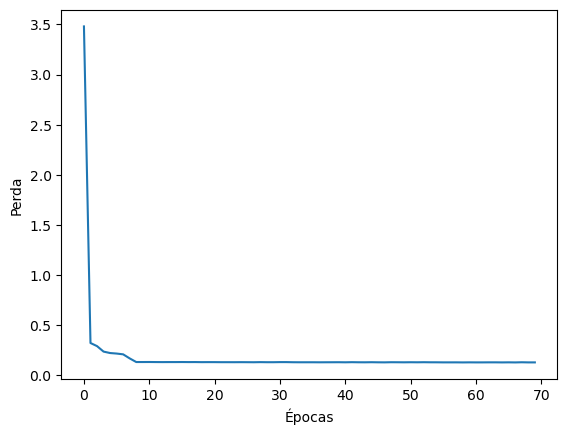

Acurácia do modelo: 96.55%


In [24]:
# Criar modelo MLP com 2 camadas oculta de 64 e 36 neurônios e função de ativação ReLU
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 36,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.5,
    max_iter=100 # número de épocas
)

# Treinando o modelo
loss = mlp.fit(X_train, y_train).loss_

# Imprimindo se houve ou não early stopping
print(mlp.n_iter_, "épocas realizadas")
if mlp.n_iter_ == mlp.max_iter:
    print("O treinamento não foi interrompido prematuramente (sem Early Stopping)")
else:
    print("O treinamento foi interrompido prematuramente (com Early Stopping)")
    
# Plotando o gráfico da perda ao longo do treinamento
plt.plot(mlp.loss_curve_)
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

# Avaliar o desempenho do modelo no conjunto de teste
accuracy = mlp.score(X_test, y_test)
print("Acurácia do modelo: {:.2f}%".format(accuracy*100))

In [25]:
from mlxtend.plotting import plot_confusion_matrix

def show_metrics(y_test, y_pred):
  # Obter previsões no conjunto de teste
  #y_pred = neural_network.predict(X_test)

  # Matriz de confusão
  conf_matrix = confusion_matrix(y_test, y_pred)
  print('Matriz de Confusão')

  fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,figsize=(10, 10))
  plt.show()

  # Acurácia
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia:', accuracy)

  # F-score
  f_score = f1_score(y_test, y_pred, average='weighted')
  print('F-Score:', f_score)

  # Precisão
  precision = precision_score(y_test, y_pred, average='weighted')
  print('Precisão:', precision)

  # Revocação
  recall = recall_score(y_test, y_pred, average='weighted')
  print('Revocação:', recall)

Matriz de Confusão


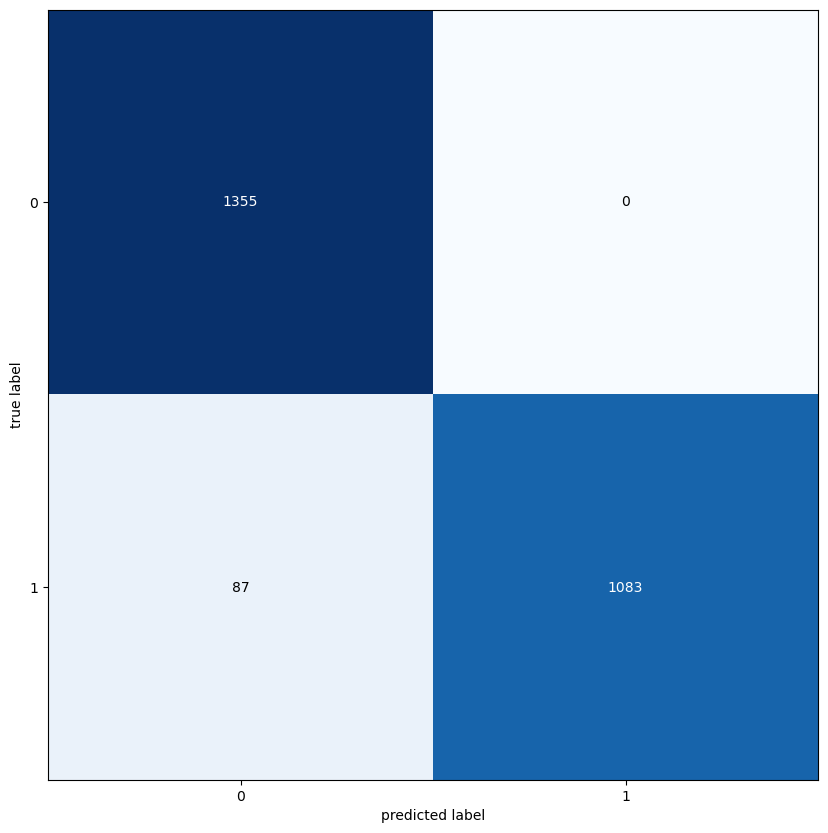

Acurácia: 0.9655445544554455
F-Score: 0.965415166941405
Precisão: 0.9676233504071627
Revocação: 0.9655445544554455


In [26]:
y_pred = mlp.predict(X_test)
show_metrics(y_test, y_pred)

In [27]:
# Gerando arquiteturas pra busca em grade

In [28]:
from math import sqrt

Ni = 92
No = 1
alpha_values = [0.5, 2, 3]

for alpha in alpha_values:
  Nh = round(alpha * Ni*No)
  print(f"Para α = {alpha}, Nh = {Nh}")

n_elem = 30
arquiteturas = []

alpha_1 = 2.1875
alpha_2 = 2
alpha_3 = 1.8125
alpha_values = [alpha_1, alpha_2, alpha_3]

Nh_values = []
for alpha in alpha_values:
  Nh = Nh = round(alpha * sqrt(Ni*No))
  Nh_values.append(Nh)

#for Nh in Nh_values:
Nh = Nh_values[0]
for i in range(1, 11):
    Nh_1 = Ni + i
    t = (Nh_1, abs(Nh - Nh_1))
    arquiteturas.append(t)
    
print("Arquiteturas geradas: ")
#for i in range(3):
i = 0
print(arquiteturas[i*10:(i+1)*10])

Para α = 0.5, Nh = 46
Para α = 2, Nh = 184
Para α = 3, Nh = 276
Arquiteturas geradas: 
[(93, 72), (94, 73), (95, 74), (96, 75), (97, 76), (98, 77), (99, 78), (100, 79), (101, 80), (102, 81)]


In [29]:
param_grid = {
    'hidden_layer_sizes': arquiteturas,
    'activation': ['relu', 'logistic'],
    'batch_size': [16, 32],
    'solver': ['adam'],
    #'beta_1': [0.99999, 0.9, 0.8],
    #'beta_2': [0.999, 0.95, 0.9],
    'early_stopping': [True],
    'n_iter_no_change': [25, 50]
}

In [30]:
mlp = MLPClassifier(random_state=42)

In [34]:
grid_search = GridSearchCV(mlp, param_grid, scoring='accuracy', verbose=3, n_jobs=-2, error_score='raise')

In [35]:
y_train

8010    0
7284    1
44      0
3411    0
7314    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: is-edible_POISONOUS, Length: 5891, dtype: uint8

In [36]:
from timeit import default_timer as timer
start = timer()

grid_search.fit(X_train, y_train)

end = timer()
print(end - start)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\luizg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\luizg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\luizg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\luizg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\luizg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\luizg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

1162.2421354


C:\Users\luizg\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Matriz de Confusão


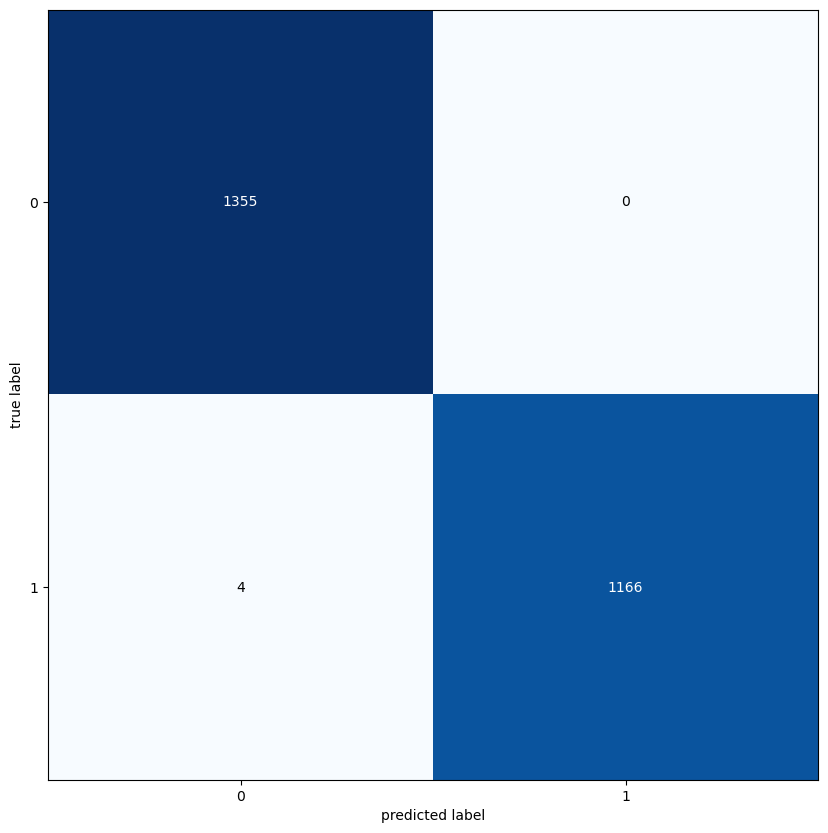

Acurácia: 0.9984158415841584
F-Score: 0.998415652681651
Precisão: 0.9984205043020858
Revocação: 0.9984158415841584


In [37]:
# Acurácia da melhor rede com o conjunto de testes

y_pred = grid_search.predict(X_test)
show_metrics(y_test, y_pred)

In [38]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_hidden_layer_sizes', 'param_activation', 'param_batch_size', 'param_n_iter_no_change', 'mean_test_score', 'std_test_score']]
results = results.sort_values('mean_test_score', ascending=False)
results

,param_hidden_layer_sizes,param_activation,param_batch_size,param_n_iter_no_change,mean_test_score,std_test_score
26,"(96, 75)",relu,32,25,0.999830,0.000340
27,"(96, 75)",relu,32,50,0.999830,0.000340
6,"(96, 75)",relu,16,25,0.999660,0.000416
7,"(96, 75)",relu,16,50,0.999660,0.000416
0,"(93, 72)",relu,16,25,0.999491,0.000679
...,...,...,...,...,...,...
54,"(100, 79)",logistic,16,25,0.997963,0.000865
78,"(102, 81)",logistic,32,25,0.996096,0.001748
79,"(102, 81)",logistic,32,50,0.996096,0.001748
59,"(102, 81)",logistic,16,50,0.995756,0.002461
